In [93]:
import warnings
warnings.filterwarnings('ignore')

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [95]:
crop = pd.read_csv("Crop_recommendation.csv")

In [96]:
# Step 3: Explore the dataset
print("First 5 rows of the dataset:")
crop.head()
# print(crop.head())

First 5 rows of the dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [97]:
print("\nDataset information:")
print(crop.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [98]:
crop.shape

(2200, 8)

In [99]:
print("\nStatistical summary of the dataset:")
print(crop.describe())


Statistical summary of the dataset:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298

In [100]:
# Step 4: Check for missing values
print("\nMissing values in the dataset:")
print(crop.isnull().sum())


Missing values in the dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


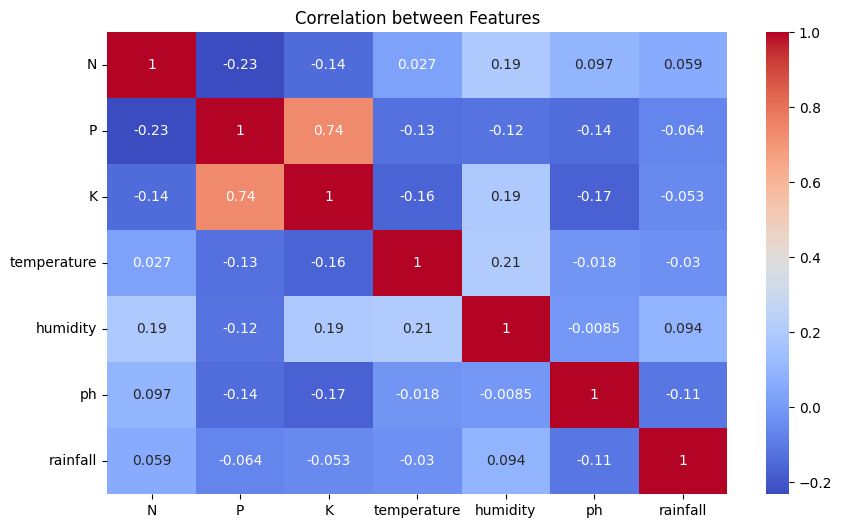

In [101]:
# Step 5: Data visualization (optional)
# Let's visualize the correlation matrix between the numeric features
plt.figure(figsize=(10, 6))

# Select only numeric columns
numeric_cols = crop.select_dtypes(include=[np.number])

# Create the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()


In [102]:
print(crop.dtypes)


N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [103]:
non_numeric = crop.select_dtypes(exclude=['number'])
print(non_numeric)


       label
0       rice
1       rice
2       rice
3       rice
4       rice
...      ...
2195  coffee
2196  coffee
2197  coffee
2198  coffee
2199  coffee

[2200 rows x 1 columns]


In [104]:
numeric_crop = crop.select_dtypes(include=['number'])
correlation_matrix = numeric_crop.corr()
print(correlation_matrix)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


In [105]:
print(crop.columns)
crop.columns = crop.columns.str.strip()
print(crop.head())




Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [106]:
# Step 6: Prepare data for training
# Separating features (X) and labels (y)
X = crop.drop(columns=['label'])  # Assuming 'label' column contains crop names
y = crop['label']


In [107]:
# Encoding the labels (crop names) into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Converts crop names to numerical labels


In [108]:
# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [110]:
# Step 9: Make predictions and evaluate the model
y_pred = model.predict(X_test)

In [111]:
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the RandomForest model: {accuracy*100:.2f}%")

Accuracy of the RandomForest model: 99.32%


In [112]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

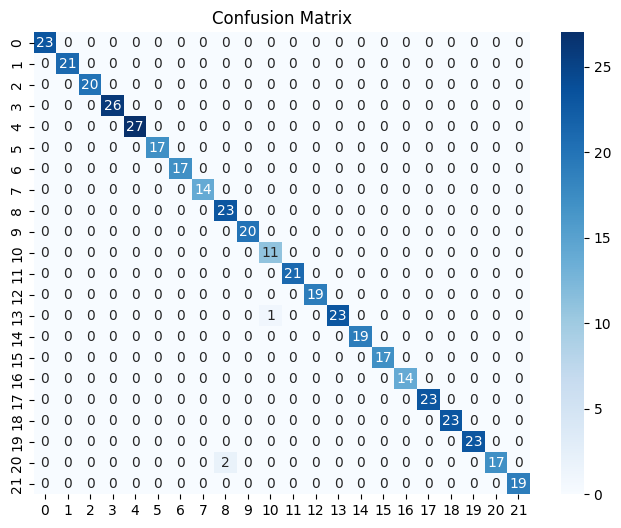

In [113]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [114]:
# Step 10: Save the trained model (optional, for deployment)
import joblib
joblib.dump(model, 'crop_recommendation_model.pkl')


['crop_recommendation_model.pkl']

In [115]:
# Step 11: Make a prediction for a new input
new_data = np.array([[11,140,200,30,83,5,66]])  # Example input
prediction = model.predict(new_data)
predicted_crop = le.inverse_transform(prediction)  # Convert back to crop name
print(f"Predicted crop for the given input: {predicted_crop[0]}")

Predicted crop for the given input: grapes
